In [1]:
import pandas as pd
import random

# Updated location map with observed variations
location_map_updated = {
    'AD': 'Asylum Down',
    'ASH': 'Ashaiman',
    'EL': 'East Legon',
    'JT': 'Jamestown',
    'LA': 'Labadi',
    'N1': 'N1 West Motorway', 'N1W': 'N1 West Motorway', 'N1WEST': 'N1 West Motorway',
    'NIMA': 'Nima', 'NM': 'Nima',
    'TMW': 'Tema Motorway',
    'TAIFA': 'Taifa', 'TF': 'Taifa',
    'UGH': 'University of Ghana'
}

# Parsing function with debug capability, now also returning the full file path
def parse_file_info_debug(file_name):
    try:
        full_path = file_name.strip()  # Capture the full file path
        filename = full_path.split('/')[-1].replace('.7z', '').replace('.zip', '')
        location_code = filename.split('_')[0].upper()
        location_full = location_map_updated.get(location_code, "Unknown Location")
        date_parts = filename.split('_')[1:4]
        date = f"{date_parts[0]}_{date_parts[1]}_{date_parts[2]}" if len(date_parts) == 3 else "Invalid Date"
        camera = filename.split('_')[4] if len(filename.split('_')) > 4 else "Invalid Camera"
        return full_path, location_full, date, camera  # Include full path in return
    except Exception as e:
        print(f"Error parsing file: {file_name.strip()} -> Error: {e}")
        return file_name.strip(), "Error Parsing", "Error Parsing", "Error Parsing"

# Apply parsing function to the entire dataset
file_path = 'camera_file_list.txt'  # Update with actual file path
with open(file_path, 'r') as file:
    lines = file.readlines()

full_dataset_data = [parse_file_info_debug(file) for file in lines]
df_full_dataset = pd.DataFrame(full_dataset_data, columns=['Full File Path', 'Site Location', 'Date', 'Camera'])

# Save the parsed dataset to a CSV file
output_file_path = 'full_dataset_parsed.csv'  # Update with desired output path
df_full_dataset.to_csv(output_file_path, index=False)


In [2]:
df_full_dataset.head()

,Full File Path,Site Location,Date,Camera
0,Camera/EL_05_08_2019_C12_S63.7z,East Legon,05_08_2019,C12
1,Camera/Nima_06_09_2019_C2_S21.7z,Nima,06_09_2019,C2
2,Camera/AD_29_11_2019_C4_S85.7z,Asylum Down,29_11_2019,C4
3,Camera/UGH_03_06_2019_C12_S10.7z,University of Ghana,03_06_2019,C12
4,Camera/AD_29_11_2019_C17_S21.7z,Asylum Down,29_11_2019,C17


In [6]:
import pandas as pd
import os
from tqdm.notebook import tqdm

# Adjusted parsing function based on the provided approach
def parse_txt_file_for_listings(txt_file_path):
    parsed_data = []
    with open(txt_file_path, 'r') as file:
        for line in file:
            if '.JPG' in line:
                parts = line.split()
                file_name = parts[-1]  # Assuming the file name is always the last part
                date_time = f"{parts[0]} {parts[1]}"
                parsed_data.append((date_time, file_name))
    
    df_corrected = pd.DataFrame(parsed_data, columns=['Timestamp', 'File Name'])
    df_corrected['Timestamp'] = pd.to_datetime(df_corrected['Timestamp'])
    return df_corrected

txt_files_dir = './zip_sample/'  # Ensure this directory path is correct
txt_files = [f for f in os.listdir(txt_files_dir) if f.endswith('.txt')]

results = []
for txt_file in tqdm(txt_files, desc="Processing txt files"):
    txt_file_path = os.path.join(txt_files_dir, txt_file)
    df_corrected = parse_txt_file_for_listings(txt_file_path)
    results.append((txt_file, len(df_corrected)))

df_results = pd.DataFrame(results, columns=['File Name', 'Parsed Entries Count'])
df_results

Processing txt files:   0%|          | 0/20 [00:00<?, ?it/s]

,File Name,Parsed Entries Count
0,EL_11_07_2022_C18_S30.txt,2028
1,Taifa_30_07_2023_C26_S300.txt,2018
2,AD_09_12_2022_C4_S29.txt,2013
3,Nima_21_05_2021_C40_S28.txt,2038
4,UGH_03_02_2020_C33_S9.txt,1994
5,UGH_03_06_2019_C12_S10.txt,2005
6,Nima_06_08_2021_C40_S304.txt,2018
7,N1W_27_03_2023_C8_S28.txt,2040
8,AD_02_10_2020_C17_S30.txt,2011
9,LA_05_07_2019_C35_S11.txt,2024


In [31]:
import pandas as pd
import os
from tqdm.notebook import tqdm

def parse_txt_file_for_listings(txt_file_path):
    parsed_data = []
    with open(txt_file_path, 'r') as file:
        for line in file:
            if '.JPG' in line:
                parts = line.split()
                date_time_str = f"{parts[0]} {parts[1]}"
                file_name = parts[-1]  # Assuming the file name is always the last part
                parsed_data.append({'DateTime': pd.to_datetime(date_time_str), 'File': file_name})
    return pd.DataFrame(parsed_data)

txt_files_dir = 'zip_contents'
expanded_data = []import pandas as pd

expanded_output_file_path = 'expanded_full_dataset_parsed.csv'  # Ensure this is defined

# Check for the existence of the CSV file and load it if present
if os.path.exists(expanded_output_file_path):
    df_expanded_dataset = pd.read_csv(expanded_output_file_path)
    # Create a set of already processed file paths for quick lookup
    processed_files = set(df_expanded_dataset['Full File Path'])
else:
    df_expanded_dataset = pd.DataFrame(columns=['Full File Path', 'Site Location', 'DateTime', 'Camera', 'File', 'Zipped Filename Date'])
    processed_files = set()

for index, row in tqdm(df_full_dataset.iterrows(), total=df_full_dataset.shape[0], desc="Processing zip files"):
    if row['Full File Path'] in processed_files:
        continue  # Skip processing if this file is already in the dataframe
    
    zip_file_name = row['Full File Path'].split('/')[-1]
    txt_file_name = zip_file_name.replace('.7z', '.txt').replace('.zip', '.txt')
    txt_file_path = os.path.join(txt_files_dir, txt_file_name)
    
    if os.path.exists(txt_file_path):
        listings_df = parse_txt_file_for_listings(txt_file_path)
        listings_df['Full File Path'] = row['Full File Path']
        listings_df['Site Location'] = row['Site Location']
        listings_df['Camera'] = row['Camera']
        listings_df['Zipped Filename Date'] = pd.to_datetime(row['Date'], format='%d_%m_%Y', errors='coerce')
        
        df_expanded_dataset = pd.concat([df_expanded_dataset, listings_df], ignore_index=True)
        processed_files.add(row['Full File Path'])  # Add this file to the set of processed files

    if index % 100 == 0 and not df_expanded_dataset.empty:  # Save intermittently
        df_expanded_dataset.to_csv(expanded_output_file_path, index=False)

# Save the final dataset
df_expanded_dataset.to_csv(expanded_output_file_path, index=False)


Processing zip files:   0%|          | 0/3425 [00:00<?, ?it/s]

In [34]:
# len(df_expanded_dataset)
df_expanded_dataset.head(20)

,Full File Path,Site Location,DateTime,Camera,File,Zipped Filename Date
0,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:10:42,C12,EL_05_08_2019_C12_S63/MFDC8398.JPG,2019-08-05
1,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:15:42,C12,EL_05_08_2019_C12_S63/MFDC8399.JPG,2019-08-05
2,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:20:42,C12,EL_05_08_2019_C12_S63/MFDC8400.JPG,2019-08-05
3,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:25:42,C12,EL_05_08_2019_C12_S63/MFDC8401.JPG,2019-08-05
4,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:30:42,C12,EL_05_08_2019_C12_S63/MFDC8402.JPG,2019-08-05
5,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:35:42,C12,EL_05_08_2019_C12_S63/MFDC8403.JPG,2019-08-05
6,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:40:42,C12,EL_05_08_2019_C12_S63/MFDC8404.JPG,2019-08-05
7,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:45:42,C12,EL_05_08_2019_C12_S63/MFDC8405.JPG,2019-08-05
8,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:50:42,C12,EL_05_08_2019_C12_S63/MFDC8406.JPG,2019-08-05
9,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:55:42,C12,EL_05_08_2019_C12_S63/MFDC8407.JPG,2019-08-05


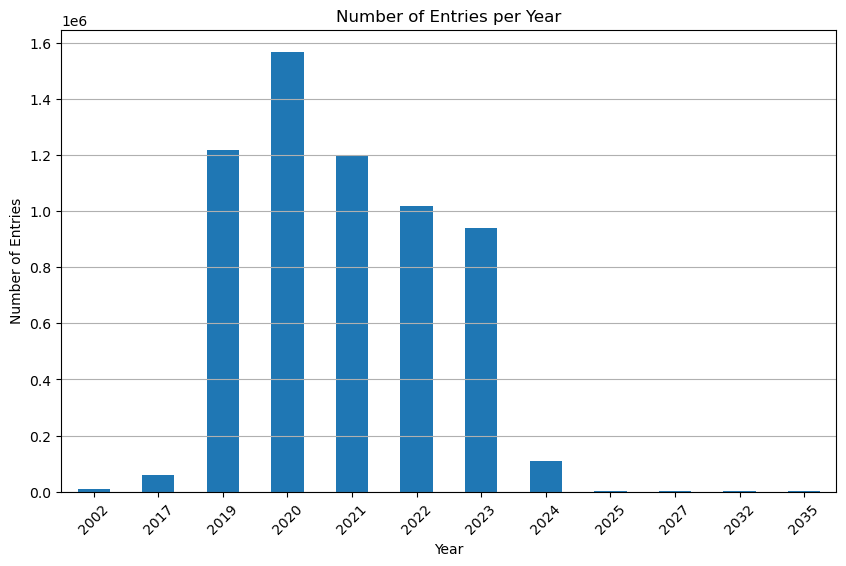

In [35]:
import matplotlib.pyplot as plt
import pandas as pd  # Make sure pandas is imported

# Ensure 'DateTime' column is treated as datetime type
df_expanded_dataset['DateTime'] = pd.to_datetime(df_expanded_dataset['DateTime'])

# Now, extracting the year should work without errors
df_expanded_dataset['Year'] = df_expanded_dataset['DateTime'].dt.year

# Proceed with your plotting
year_counts = df_expanded_dataset['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_194/3304563565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images_expanded_dataset['Date'] = df_images_expanded_dataset['DateTime'].dt.date


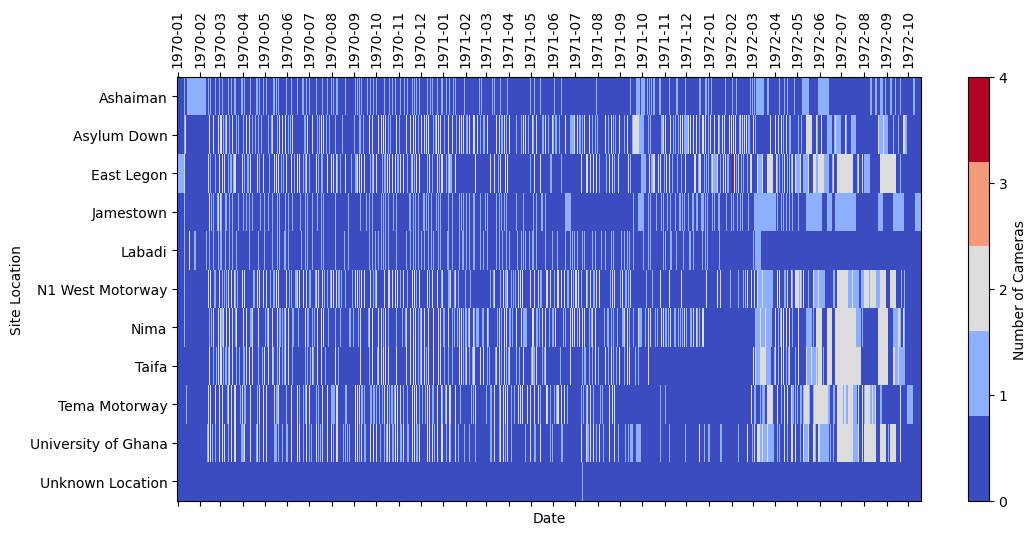

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Assuming df_images_expanded_dataset is your filtered DataFrame

# Extracting the date from the DateTime column for grouping
df_expanded_dataset['Date'] = df_images_expanded_dataset['DateTime'].dt.date

# Grouping by Site Location and Date, and counting unique cameras
grouped = df_expanded_dataset.groupby(['Site Location', 'Date'])['Camera'].nunique().reset_index()

# Creating a pivot table for visualization, filling missing days with 0
pivot = grouped.pivot_table(index='Site Location', columns='Date', values='Camera', fill_value=0)

# Preparing the plot
fig, ax = plt.subplots(figsize=(12, len(pivot.index) * 0.5))

# Creating a color map where 0 cameras = white, 1 camera = blue, 2 cameras = red, etc.
cmap = plt.get_cmap('coolwarm', np.max(pivot.values)+1)

# Plotting the timeline
cax = ax.matshow(pivot, cmap=cmap, aspect='auto')

# Setting ticks and labels
ax.set_yticks(np.arange(len(pivot.index)))
ax.set_yticklabels(pivot.index)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Site Location')

# Adding a color bar to indicate the number of cameras
cbar = fig.colorbar(cax, ticks=np.arange(np.max(pivot.values)+1))
cbar.ax.set_ylabel('Number of Cameras')

plt.show()
